In [1]:
suppressMessages(suppressWarnings(source("../config_duke.R")))

You are on Duke Server: DCC
BASE DIRECTORY:     /work/kk319 
WORK DIRECTORY:     /work/kk319/out/CombEffect_STARR 
LOG  DIRECTORY:     /work/kk319/out/CombEffect_STARR/log 
PATH OF SOURCE:     /work/kk319/source 
PATH OF EXECUTABLE: /work/kk319/exe 
PATH OF ANNOTATION: /work/kk319/annotation 


In [2]:
FD_MTF = file.path(FD_ANN, "motif_cluster_jvierstra", "hg38_archetype_motifs_v1")

In [3]:
ctypes = c(col_character(), col_integer(), col_integer(), col_character(), col_double())
cnames = c("Chrom", "Start", "End", "Motif", "Score")
chrom = "chr17"
fdiry = file.path(FD_MTF, chrom)

fname = "NR_20_merge.bed"
dat_mtf_nr20 = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

fname = "AP1_1_merge.bed"
dat_mtf_ap11 = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

fname = "AP1_2_merge.bed"
dat_mtf_ap12 = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

In [4]:
lst_mtf = list("NR/20" = "red", "AP1/1" = "cornflowerblue", "AP1/2" = "chartreuse4")

In [6]:
dat_mtf = bind_rows(dat_mtf_nr20, dat_mtf_ap11, dat_mtf_ap12) %>% 
    dplyr::filter(8148000 <= Start, Start <= 8160000) %>%
    mutate(Color = unlist(lst_mtf[Motif]))
dat_mtf

Chrom,Start,End,Motif,Score,Color
chr17,8150232,8150246,NR/20,8.32560,red
chr17,8150831,8150845,NR/20,7.34290,red
chr17,8151912,8151926,NR/20,11.86410,red
chr17,8154459,8154474,NR/20,15.34770,red
chr17,8154760,8154775,NR/20,8.20005,red
chr17,8148425,8148433,AP1/1,6.73210,cornflowerblue
chr17,8148917,8148925,AP1/1,8.05140,cornflowerblue
chr17,8149893,8149901,AP1/1,7.73910,cornflowerblue
chr17,8152141,8152149,AP1/1,7.57600,cornflowerblue
chr17,8152552,8152560,AP1/1,8.13900,cornflowerblue


In [29]:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")
target = "target_PER1"
fdiry  = file.path(FD_WRK, "coverage", target)

fname  = "Input?_perbase.txt"
lst_input = lapply(Sys.glob(file.path(fdiry, fname)), function(fpath){
    sid = str_remove(basename(fpath), "_perbase.txt")
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sid
    return(dat)
})

fname  = "TFX?_DMSO_perbase.txt"
lst_dmso = lapply(Sys.glob(file.path(fdiry, fname)), function(fpath){
    sid = str_remove(basename(fpath), "_perbase.txt")
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sid
    return(dat)
})

In [30]:
head(lst_input[[1]])

Chrom,Loc,Depth,Sample
chr17,8148000,10,Input1
chr17,8148001,10,Input1
chr17,8148002,10,Input1
chr17,8148003,10,Input1
chr17,8148004,10,Input1
chr17,8148005,10,Input1


In [31]:
head(lst_dmso[[1]])

Chrom,Loc,Depth,Sample
chr17,8148000,43,TFX2_DMSO
chr17,8148001,44,TFX2_DMSO
chr17,8148002,45,TFX2_DMSO
chr17,8148003,44,TFX2_DMSO
chr17,8148004,44,TFX2_DMSO
chr17,8148005,44,TFX2_DMSO


In [9]:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc")

target = "target_PER1"
fdiry  = file.path(FD_WRK, "coverage", target)

sid    = "Input"
fname  = paste0(sid, "_perbase.txt")
dat_input = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = c(cnames, sid))

sid    = "TFX_DMSO"
fname  = paste0(sid, "_perbase.txt")
dat_dmso = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = c(cnames, sid))

sid    = "TFX_Dex"
fname  = paste0(sid, "_perbase.txt")
dat_dex = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = c(cnames, sid))

In [10]:
get_trt = function(txt){
    if (str_detect(txt, "Input")){
        trt = "Input"
    }
    if (str_detect(txt, "_.*")){
        trt = str_extract(txt, "_.*")
        trt = paste0("TFX", trt)
    }
    if (str_detect(txt, "total")){
        trt = "total"
    }
    return(trt)
}

In [11]:
ctypes = c(col_integer(), col_character())
cnames = c("Size", "Fpath")

fdiry = file.path(FD_WRK, "source")
fname = "library_size.txt"

dat_lib_size = read_tsv(
    file.path(fdiry, fname), 
    col_types = ctypes, 
    col_names = cnames)

dat_lib_size = dat_lib_size %>% mutate(Sample=tools::file_path_sans_ext(basename(Fpath)))
dat_lib_size = dat_lib_size %>% rowwise() %>% mutate(Trt=get_trt(Sample))
dat_lib_size

Size,Fpath,Sample,Trt
18666630,/work/kk319/out/CombEffect_STARR/source/Input1/Input1.bedpe,Input1,Input
20167924,/work/kk319/out/CombEffect_STARR/source/Input2/Input2.bedpe,Input2,Input
23280988,/work/kk319/out/CombEffect_STARR/source/Input3/Input3.bedpe,Input3,Input
19003938,/work/kk319/out/CombEffect_STARR/source/Input4/Input4.bedpe,Input4,Input
15325016,/work/kk319/out/CombEffect_STARR/source/Input5/Input5.bedpe,Input5,Input
48376253,/work/kk319/out/CombEffect_STARR/source/TFX2_AZD2906/TFX2_AZD2906.bedpe,TFX2_AZD2906,TFX_AZD2906
52542517,/work/kk319/out/CombEffect_STARR/source/TFX2_AZD9567/TFX2_AZD9567.bedpe,TFX2_AZD9567,TFX_AZD9567
43646484,/work/kk319/out/CombEffect_STARR/source/TFX2_CORT108297/TFX2_CORT108297.bedpe,TFX2_CORT108297,TFX_CORT108297
41732268,/work/kk319/out/CombEffect_STARR/source/TFX2_CpdA/TFX2_CpdA.bedpe,TFX2_CpdA,TFX_CpdA
43844606,/work/kk319/out/CombEffect_STARR/source/TFX2_DMSO/TFX2_DMSO.bedpe,TFX2_DMSO,TFX_DMSO


In [12]:
dat = dat_lib_size
lst_lib_sam = split(dat$Size, dat$Sample)

dat = dat_lib_size %>% group_by(Trt) %>% summarize(Size_tot = sum(Size))
lst_lib_trt = split(dat$Size_tot, dat$Trt)

In [13]:
print(lst_lib_sam["Input1"])

$Input1
[1] 18666630



In [14]:
dat = bind_rows(lst_input) %>%
    mutate(Size = unlist(lst_lib_sam[Sample])) %>%
    mutate(Depth_norm = Depth / Size)
head(dat)

Chrom,Loc,Depth,Sample,Size,Depth_norm
chr17,8148000,10,Input1,18666630,5.357153e-07
chr17,8148001,10,Input1,18666630,5.357153e-07
chr17,8148002,10,Input1,18666630,5.357153e-07
chr17,8148003,10,Input1,18666630,5.357153e-07
chr17,8148004,10,Input1,18666630,5.357153e-07
chr17,8148005,10,Input1,18666630,5.357153e-07


In [15]:
print(1)

[1] 1


In [ ]:
tmp = dat %>% filter

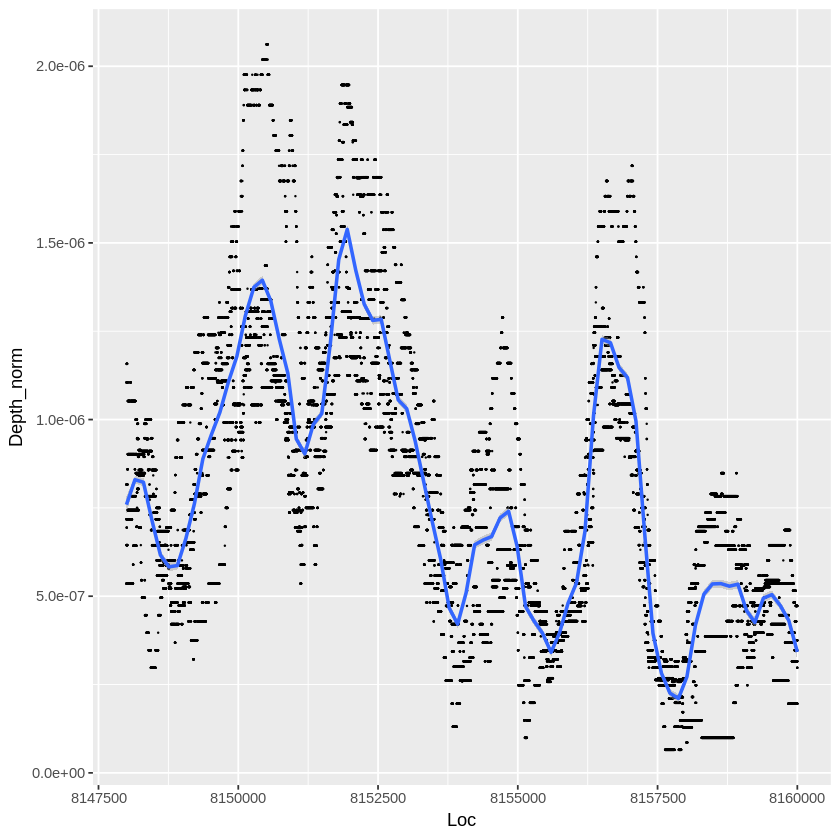

In [28]:
ggplot(dat, aes(x=Loc, y=Depth_norm)) + 
    geom_point(size=0.05) + 
    geom_smooth(method = 'loess', span = 0.05)

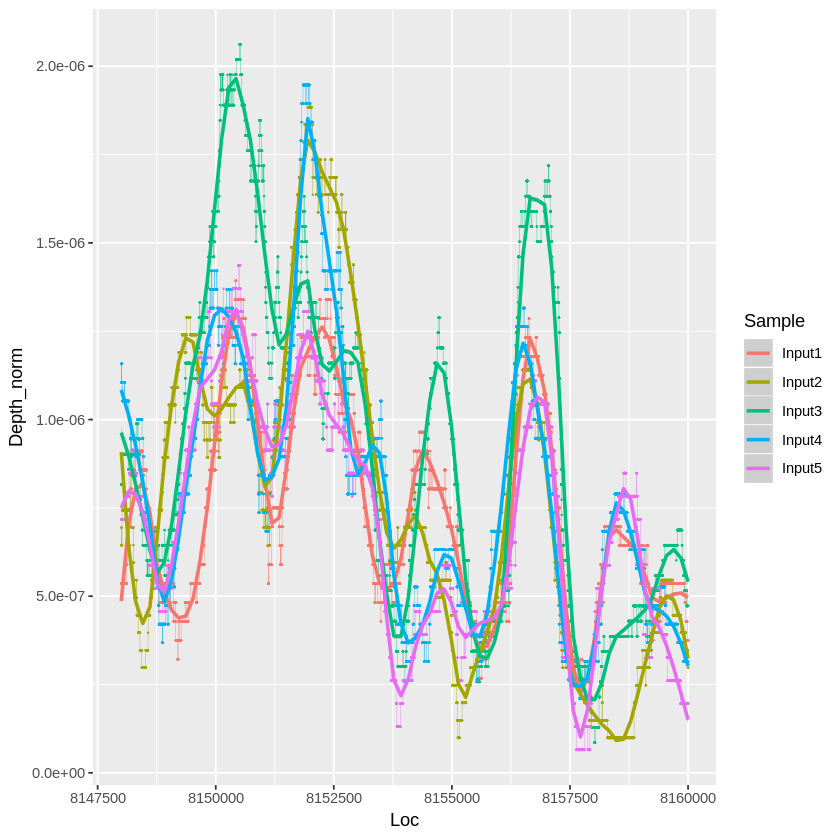

In [26]:
ggplot(dat, aes(x=Loc, y=Depth_norm, color=Sample, group=Sample)) + 
    geom_line(size=0.1) + 
    geom_point(size=0.05) + 
    geom_smooth(method = 'loess', span = 0.1)

In [68]:
###
dat = dat_input
dat = left_join(dat, dat_dmso, by=c("Chrom", "Loc"))
dat = left_join(dat, dat_dex,  by=c("Chrom", "Loc"))

###
dat = dat %>% mutate(
    Input_lognorm    = log10(Input)    - log10(lst_lib[["Input"]]),
    TFX_DMSO_lognorm = log10(TFX_DMSO) - log10(lst_lib[["TFX_DMSO"]]),
    TFX_Dex_lognorm  = log10(TFX_Dex)  - log10(lst_lib[["TFX_Dex"]])
)
dat = dat %>% mutate(
    TFX_DMSO_ratio = 10^(TFX_DMSO_lognorm - Input_lognorm),
    TFX_Dex_ratio  = 10^(TFX_Dex_lognorm  - Input_lognorm),
)
head(dat)

Chrom,Loc,Input,TFX_DMSO,TFX_Dex,Input_lognorm,TFX_DMSO_lognorm,TFX_Dex_lognorm,TFX_DMSO_ratio,TFX_Dex_ratio
chr17,8148000,74,159,140,-6.115046,-5.914130,-6.026225,1.588240,1.226932
chr17,8148001,74,160,141,-6.115046,-5.911407,-6.023134,1.598229,1.235695
chr17,8148002,74,161,141,-6.115046,-5.908701,-6.023134,1.608217,1.235695
chr17,8148003,74,160,141,-6.115046,-5.911407,-6.023134,1.598229,1.235695
chr17,8148004,76,160,140,-6.103464,-5.911407,-6.026225,1.556170,1.194644
chr17,8148005,76,160,138,-6.103464,-5.911407,-6.032474,1.556170,1.177577


Warning message:
“Ignoring unknown parameters: stat_bin”Warning message:
“Transformation introduced infinite values in continuous x-axis”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 54 rows containing non-finite values (stat_bin).”

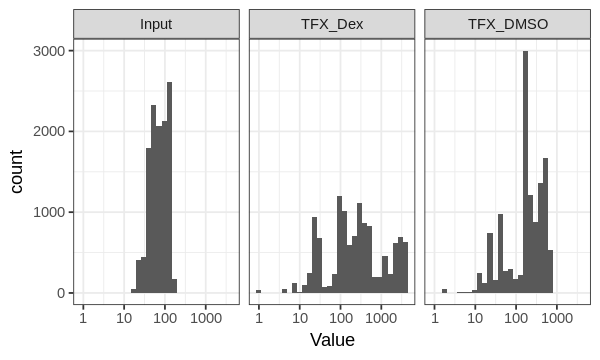

In [76]:
tmp = dat %>% dplyr::select(Input, TFX_DMSO, TFX_Dex) %>% tidyr::gather(Sample, Value)
gpt = ggplot(tmp, aes(x=Value)) + 
    geom_histogram(stat_bin = 30) + 
    scale_x_log10() +
    theme_bw() + 
    facet_wrap(~Sample)
print(gpt)

In [86]:
dat_mtf

Chrom,Start,End,Motif,Score
chr17,8150232,8150246,NR/20,8.32560
chr17,8150831,8150845,NR/20,7.34290
chr17,8151912,8151926,NR/20,11.86410
chr17,8154459,8154474,NR/20,15.34770
chr17,8154760,8154775,NR/20,8.20005


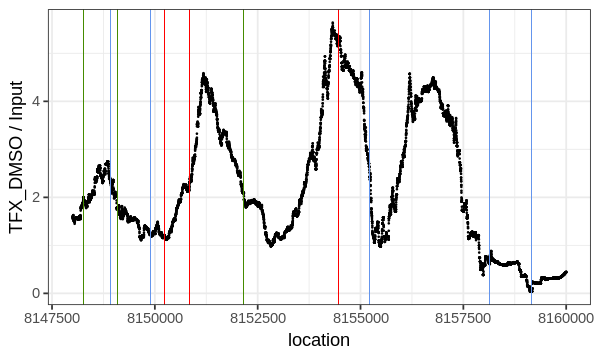

In [103]:
options(repr.plot.height=3, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Loc, y=TFX_DMSO_ratio)) + 
   geom_point(size=0.1) + 
   labs(x = "location", y = "TFX_DMSO / Input") +
   theme_bw()

gpt = gpt + annotate("rect",
         xmin = dat_mtf$Start, 
         xmax = dat_mtf$End, 
         ymin = -Inf, 
         ymax = Inf,  
         fill = dat_mtf$Color)
print(gpt)

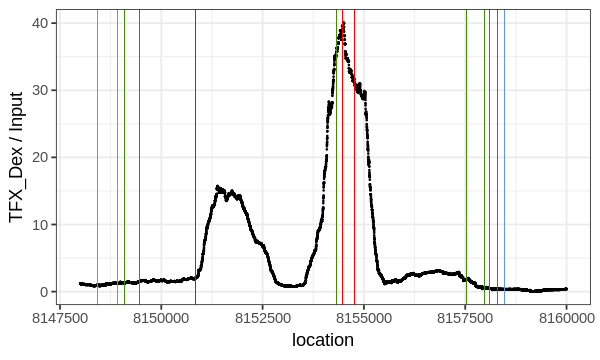

In [104]:
options(repr.plot.height=3, repr.plot.width=5)
gpt = ggplot(dat, aes(x=Loc, y=TFX_Dex_ratio)) + 
   geom_point(size=0.1) + 
   labs(x = "location", y = "TFX_Dex / Input") +
   theme_bw()

gpt = gpt + annotate("rect",
         xmin = dat_mtf$Start, 
         xmax = dat_mtf$End, 
         ymin = -Inf, 
         ymax = Inf,  
         fill = dat_mtf$Color)
print(gpt)